In [ ]:
## Importing necessary Libraries 

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from collections import Counter

In [ ]:
## Importing Reuired Excel & CSV file

In [14]:
df1=pd.read_excel("Downloads/QVI_transaction_data.xlsx")
df2=pd.read_csv("Downloads/QVI_purchase_behaviour.csv")

In [15]:
df1.shape

(264836, 8)

In [16]:
df2.shape

(72637, 3)

In [ ]:
## Checking is there any null Values in both Dataset

In [17]:
df1.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [18]:
df2.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [19]:
df1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [20]:
df2.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
## Generating Visuals for Higher sales based on the Store Number

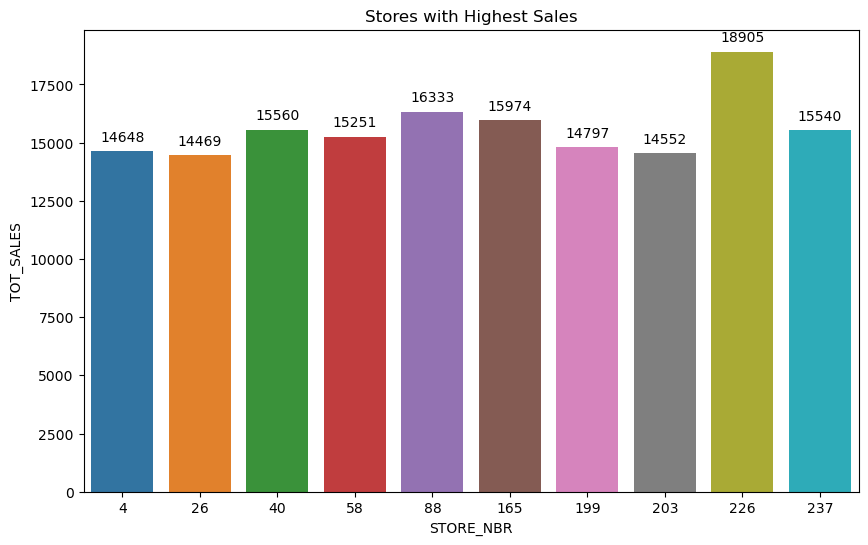

In [80]:
needed_columns=['STORE_NBR','TOT_SALES']
df3=df1[needed_columns]
df3=df3.groupby('STORE_NBR')['TOT_SALES'].sum().reset_index()
barplot=df3.sort_values(by='TOT_SALES',ascending=False).head(10)
plt.figure(figsize=(10,6))
barplot1=sns.barplot(data=barplot,x=barplot['STORE_NBR'],y=barplot['TOT_SALES'])
# Add labels above the bars
for p in barplot1.patches:
    barplot1.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')
plt.title("Stores with Highest Sales")
plt.show()

In [ ]:
## Generating visuals for lower sales based on the store number

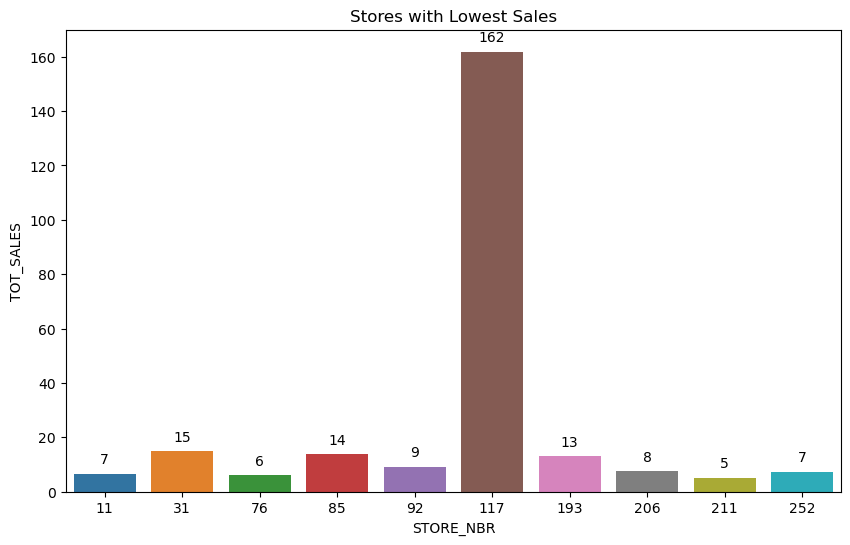

In [84]:
needed_columns=['STORE_NBR','TOT_SALES']
df4=df1[needed_columns]
df4=df3.groupby('STORE_NBR')['TOT_SALES'].sum().reset_index()
barplot1=df4.sort_values(by='TOT_SALES',ascending=True).head(10)
plt.figure(figsize=(10,6))
barplot2=sns.barplot(data=barplot1,x=barplot1['STORE_NBR'],y=barplot1['TOT_SALES'])
# Add labels above the bars
for p in barplot2.patches:
    barplot2.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')
plt.title("Stores with Lowest Sales")
plt.show()

In [ ]:
## Visuals for Top 10 sales based on Loyalty card number

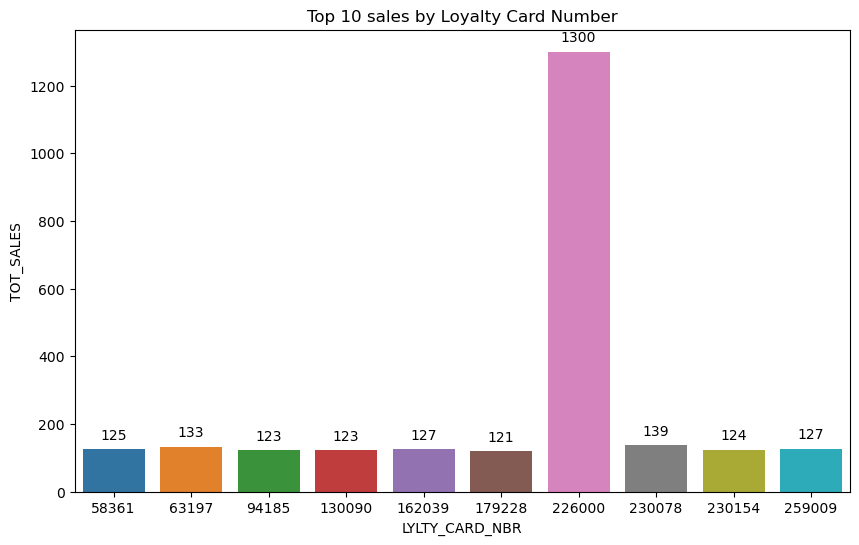

In [88]:
needed1=['LYLTY_CARD_NBR','TOT_SALES']
df5=df1[needed1]
df5=df5.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum().reset_index()
df5=df5.sort_values('TOT_SALES',ascending=False).head(10)
plt.figure(figsize=(10,6))
barplot3=sns.barplot(data=df5,x=df5['LYLTY_CARD_NBR'],y=df5['TOT_SALES'])
# Add labels above the bars
for p in barplot3.patches:
    barplot3.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')
plt.title('Top 10 sales by Loyalty Card Number')
plt.show()

In [ ]:
## Visuals for Top 10 sales based on Product number

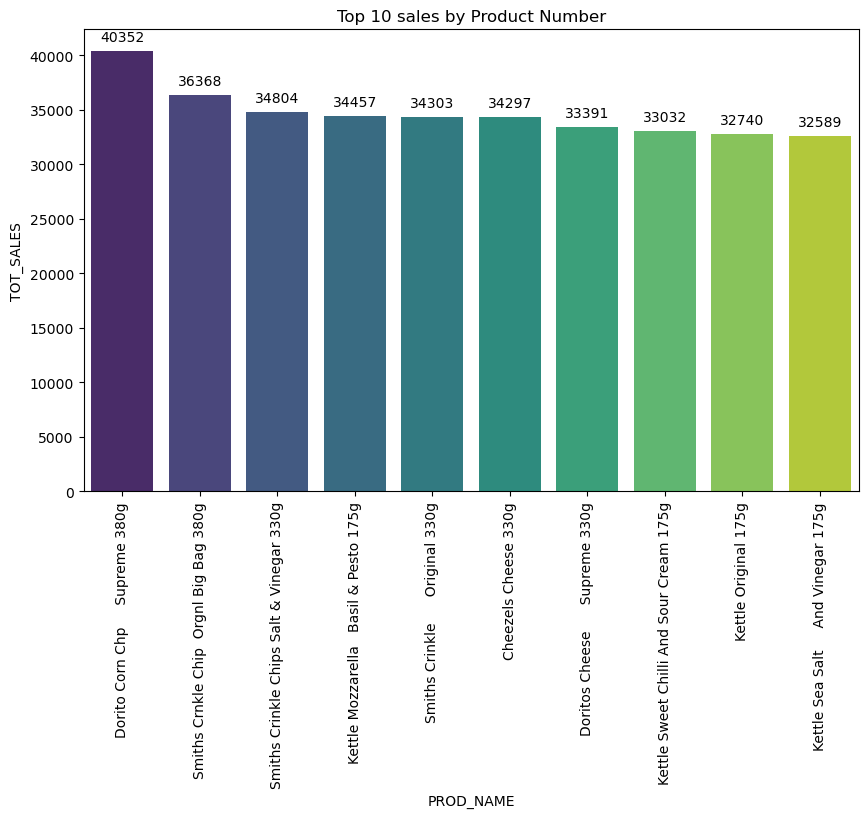

In [92]:
needed2=['PROD_NAME','TOT_SALES']
df6=df1[needed2]
df6=df6.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()
df6=df6.sort_values('TOT_SALES',ascending=False).head(10)
plt.figure(figsize=(10,6))
barplot4=sns.barplot(data=df6,x=df6['PROD_NAME'],y=df6['TOT_SALES'],palette='viridis')
# Add labels above the bars
for p in barplot4.patches:
    barplot4.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')
plt.title('Top 10 sales by Product Number')
plt.xticks(rotation=90)
plt.show()

In [ ]:
## Visuals for Bottom 10 sales based on Product number

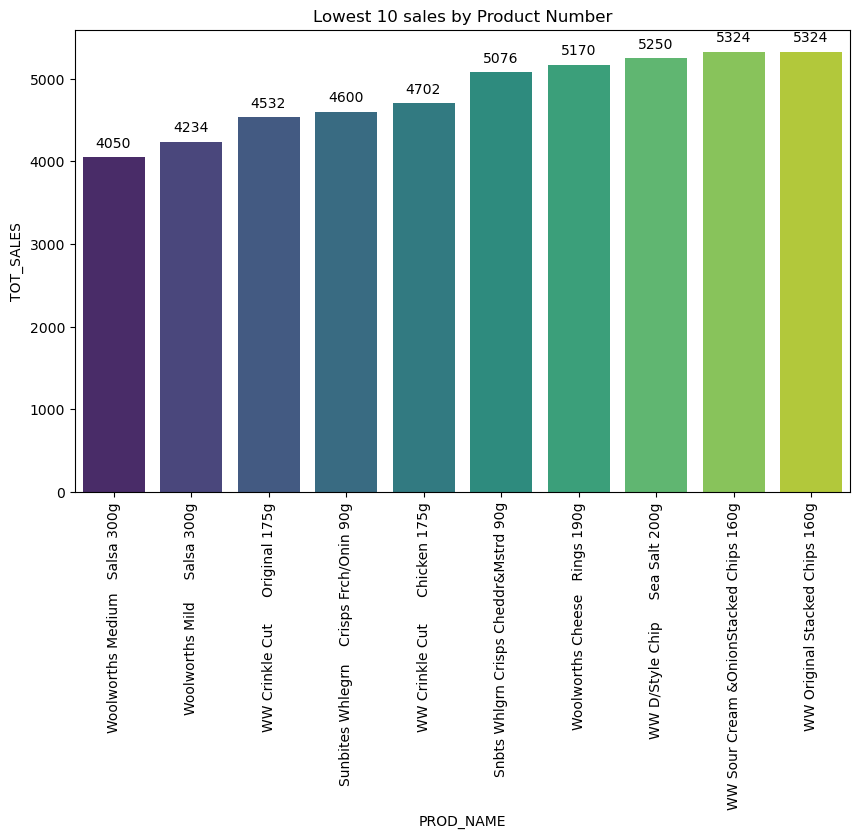

In [96]:
needed3=['PROD_NAME','TOT_SALES']
df7=df1[needed3]
df7=df7.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()
df7=df7.sort_values('TOT_SALES',ascending=True).head(10)
plt.figure(figsize=(10,6))
barplot5=sns.barplot(data=df7,x=df7['PROD_NAME'],y=df7['TOT_SALES'],palette='viridis')
# Add labels above the bars
for p in barplot5.patches:
    barplot5.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')
plt.title('Lowest 10 sales by Product Number')
plt.xticks(rotation=90)
plt.show()

In [ ]:
## Visuals for Top 10 Quantity of product sold

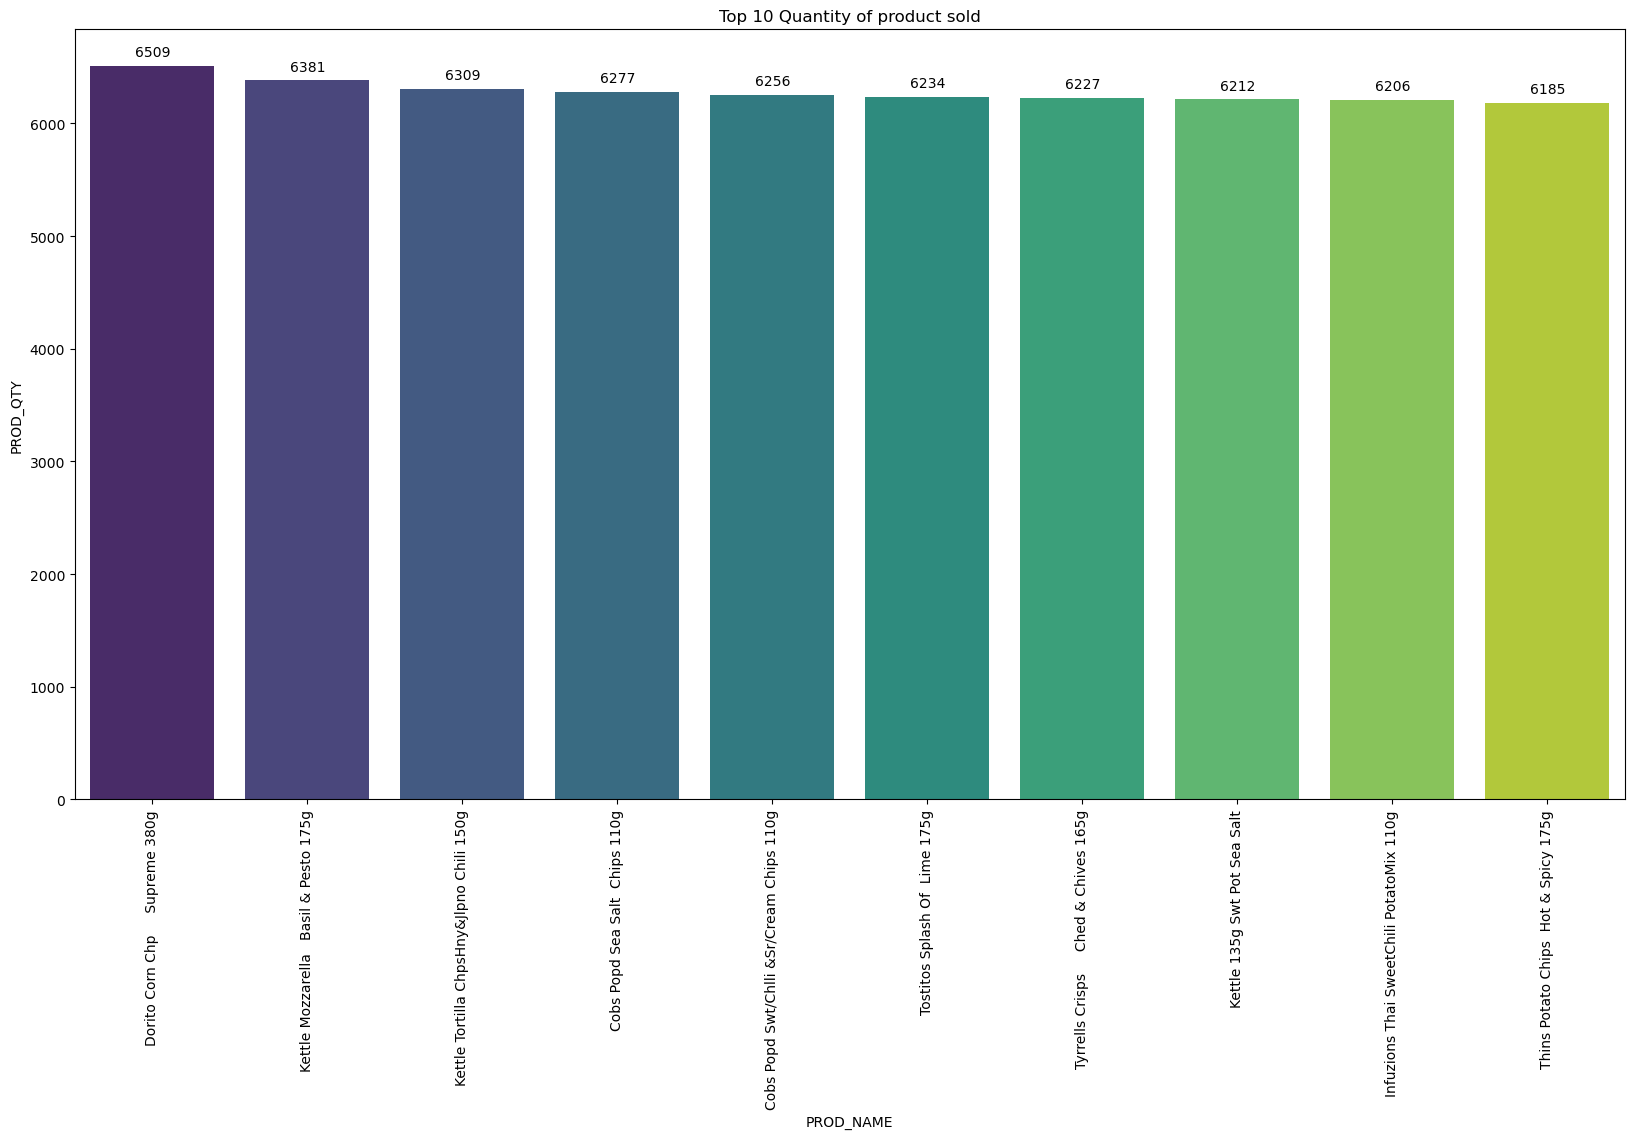

In [98]:
needed4=['PROD_NAME','PROD_QTY']
df8=df1[needed4]
df8=df8.groupby('PROD_NAME')['PROD_QTY'].sum().reset_index()
df8=df8.sort_values('PROD_QTY',ascending=False).head(10)
plt.figure(figsize=(20,10))
barplot6=sns.barplot(data=df8,x=df8['PROD_NAME'],y=df8['PROD_QTY'],palette='viridis')
# Add labels above the bars
for p in barplot6.patches:
    barplot6.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')
plt.title('Top 10 Quantity of product sold')
plt.xticks(rotation=90)
plt.show()

In [ ]:
## piechart for Purchases based on their Life stage

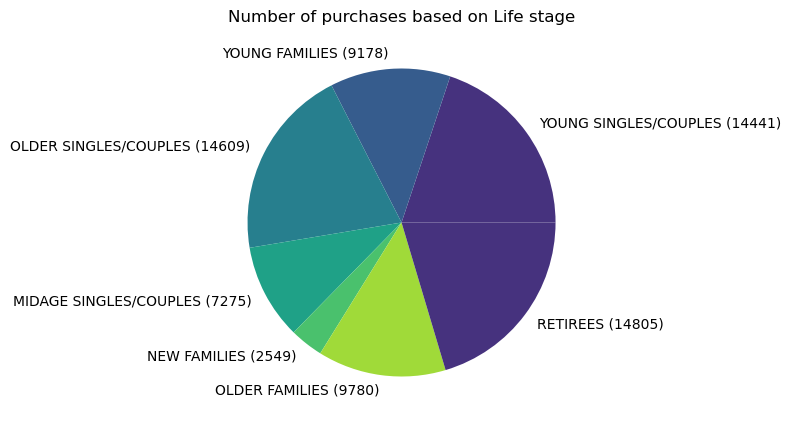

In [52]:
character_count=Counter(df2['LIFESTAGE'])
df9=pd.DataFrame(character_count.items(),columns=['LIFESTAGE','COUNT'])
df9
labels=df9['LIFESTAGE']
sizes=df9['COUNT']
colors=sns.color_palette('viridis')
custom_labels = [f'{label} ({count})' for label, count in zip(labels, sizes)]
plt.figure(figsize=(10,5))
plt.pie(sizes,labels=custom_labels,colors=colors)
plt.title('Number of purchases based on Life stage')
plt.show()

In [ ]:
## piechart for Purchases based on Premium Custmoer

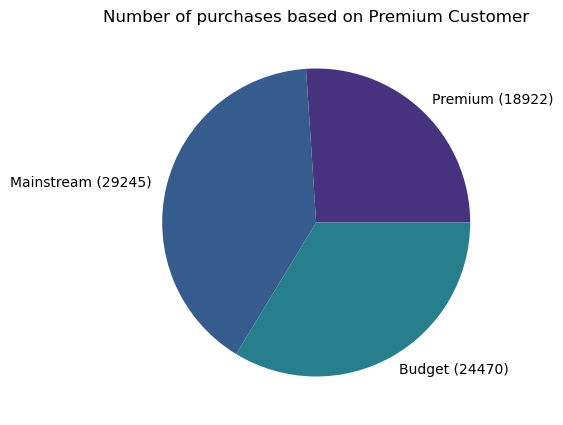

In [64]:
character_count1=Counter(df2['PREMIUM_CUSTOMER'])
df10=pd.DataFrame(character_count1.items(),columns=['PREMIUM_CUSTOMER','COUNT'])
labels=df10['PREMIUM_CUSTOMER']
sizes=df10['COUNT']
colors=sns.color_palette('viridis')
custom_labels = [f'{label} ({count})' for label, count in zip(labels, sizes)]
plt.figure(figsize=(10,5))
plt.pie(sizes,labels=custom_labels,colors=colors)
plt.title('Number of purchases based on Premium Customer')
plt.show()